# Introduction

This lab will guide you through the steps to perform face recognition using eigenfaces and Support Vector Machines (SVMs). The dataset used in this lab is a preprocessed excerpt of the "Labeled Faces in the Wild" dataset.

# Import Libraries

In [1]:
from time import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from scipy.stats import loguniform

First, we need to import all the necessary libraries.

# Load and Explore Dataset

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

We download the dataset using the **fetch_lfw_people()** function from scikit-learn. We then explore the dataset by getting the number of samples, height, and width of the images. We also get the input data **X**, target **y**, target names **target_names**, and number of classes **n_classes**.

# Data Preprocessing

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We split the dataset into a training set and a test set and preprocess the data by scaling the input data using the **StandardScaler()** function.

# Perform PCA

In [4]:
n_components = 150

pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

We perform Principal Component Analysis (PCA) to extract features from the input data. We set the number of components to 150 and fit the PCA model to the training data. We then get the eigenfaces and transform the input data into principal components.

# Train a Support Vector Machine (SVM) Classification Model

In [5]:
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}

clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)

We train a SVM classification model using the transformed data. We use **RandomizedSearchCV()** to find the best hyperparameters for the SVM model.

# Evaluate Model Performance

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.77      0.71        13
     Colin Powell       0.74      0.88      0.80        60
  Donald Rumsfeld       0.77      0.74      0.75        27
    George W Bush       0.92      0.92      0.92       146
Gerhard Schroeder       0.88      0.84      0.86        25
      Hugo Chavez       0.82      0.60      0.69        15
       Tony Blair       0.93      0.75      0.83        36

         accuracy                           0.85       322
        macro avg       0.82      0.79      0.80       322
     weighted avg       0.86      0.85      0.85       322



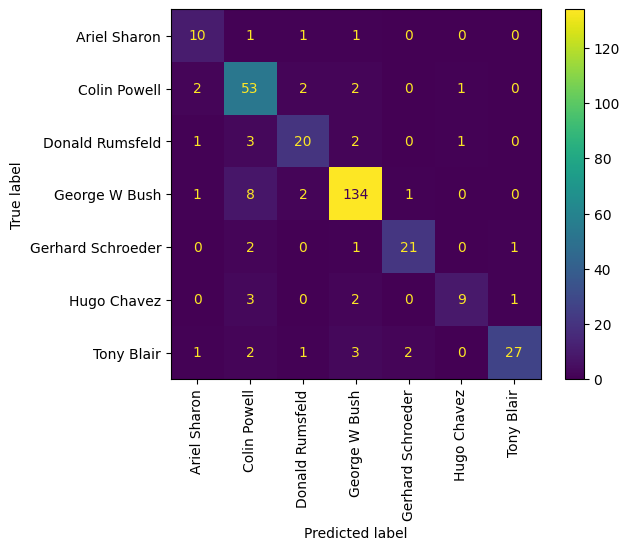

In [6]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)

We predict the target values using the test data and evaluate the model performance using the **classification_report()** function. We also plot the confusion matrix using the **ConfusionMatrixDisplay()** function.

In [7]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot the result of the prediction on a portion of the test set

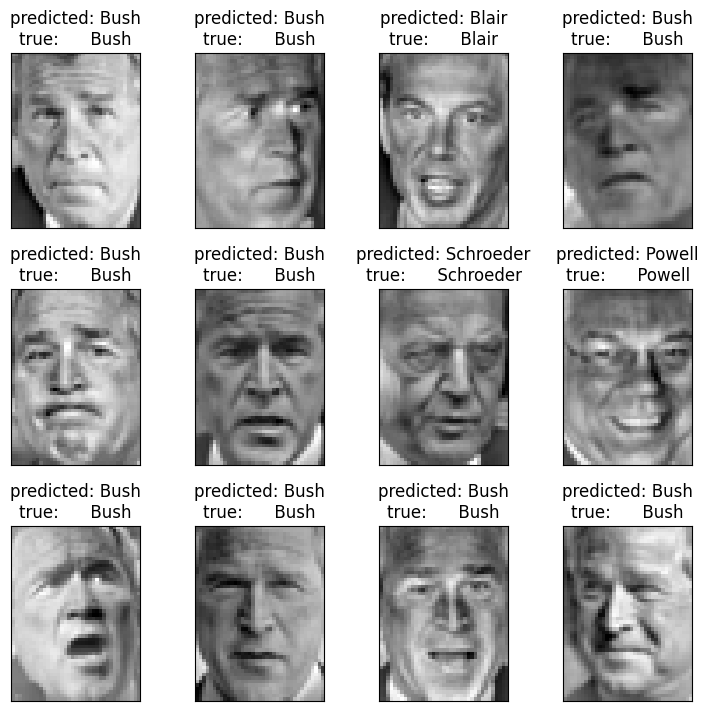

In [8]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

Face recognition problem would be much more effectively solved by training convolutional neural networks but this family of models is outside of the scope of the scikit-learn library. Interested readers should instead try to use pytorch or tensorflow to implement such models.

# Summary

In this lab, we learned how to perform face recognition using eigenfaces and SVMs. We first loaded and explored the dataset, then preprocessed the data by scaling the input data. We then performed PCA to extract features from the input data and trained a SVM classification model. We evaluated the model performance and visualized the predictions and eigenfaces.